# Process 2B 

# Importing Dependencies

In [2]:
#importing dependencies

import pandas as pd 
import numpy as np
from scipy import stats

#For plotting
import matplotlib.pyplot as plt
import seaborn as sns 


from scipy import stats

# for min_max scaling and normalization
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
# !pip install ydata-profiling
# from ydata_profiling import ProfileReport


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Wilson
path = '/content/drive/MyDrive/Classroom/DATA 6545: Data Science and MLOps SP2023/Competition 1 Data/Wilson Alexei - Competition1_raw_data.xlsx'

#Jose
#path = '/content/drive/MyDrive/Classroom/DATA 6545: Data Science and MLOps SP2023/Jose Echevarria - Competition1_raw_data.xlsx'

In [7]:
#Creating DF from path

df = pd.read_excel(path)

In [8]:
df.shape ## datasets have 682 rows and 22 columns

(682, 22)

In [9]:
df.head(10)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,...,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,...,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,...,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.599998,80,1,0.07,...,8250000,632.298,572,14830,13176,336,720,67,149,167
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.2,94,1,0.06,...,7407407,197.591,510,17999,13934,328,815,62,96,181
6,ACOR,ACORDA THERAPEUTICS INC,2836,6,13,11,6.72,128,1,-1.87,...,5500000,5.146,495,15758,13953,379,698,82,106,135
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,...,8000000,-,334,11226,10056,276,-1,55,120,122
8,ACTV,ACTIVE NETWORK INC,7372,15,18,16,15.9,100,1,-0.51,...,11000000,279.6,620,14813,13463,335,917,58,124,234
9,ACW,ACCURIDE CORP,3714,9,19,17,0,106,1,1.49,...,11000000,494.008,385,9134,8107,198,459,81,90,147


In [10]:
#All coluumns are of type object

df.dtypes

I1         object
I2         object
I3         object
P(IPO)     object
P(H)       object
P(L)       object
P(1Day)    object
C1         object
C2         object
C3         object
C4         object
C5         object
C6         object
C7         object
T1         object
T2         object
T3         object
T4         object
T5         object
S1         object
S2         object
S3         object
dtype: object

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   I1       682 non-null    object
 1   I2       682 non-null    object
 2   I3       682 non-null    object
 3   P(IPO)   682 non-null    object
 4   P(H)     682 non-null    object
 5   P(L)     682 non-null    object
 6   P(1Day)  682 non-null    object
 7   C1       682 non-null    object
 8   C2       682 non-null    object
 9   C3       682 non-null    object
 10  C4       682 non-null    object
 11  C5       682 non-null    object
 12  C6       682 non-null    object
 13  C7       682 non-null    object
 14  T1       682 non-null    object
 15  T2       682 non-null    object
 16  T3       682 non-null    object
 17  T4       682 non-null    object
 18  T5       682 non-null    object
 19  S1       682 non-null    object
 20  S2       682 non-null    object
 21  S3       682 non-null    object
dtypes:



*   As we read in the excel file, we see that all the data types are all objects so preprocessing data will be needed to do further analysis
*   We will convert them accordingly depending on the data dictionary. Continuous columns will be converted into integers/float and categorical columns may need to be converted into integers first and will be converted into a categorical/binary eventually 
*   This will also help us to spot null values in each column and impute them accordingly as well





In [12]:
## List of Industry SIC Codes

manuf_codes = [3674,3714,3661,2000,3690,3743,3721,3663,3411,2673,3621,3640,2621,3670,\
               2300,3021,3281,3651,2741,3663,2711,2090,3315,3651,2741,3663,2711,2090,\
               3315,3651,3990,3911,2015,3140,2790,2590,3100,2200,3390,3672,3334,3646,\
               3629,3442,3312,3440,3663,2080,3669,3812,3728,3452,3711,2750,3171,3720,\
               2221,3341,2510]

serv_codes = [7379,2854,3845,7389,5047,3841,5812,7334,2869,7359,2844,5945,5961,8090,\
              5033,8351,8731,5661,5600,5641,5940,5810,7312,7311,100,2870,5141,7997,\
              3822,5731,3825,7361,7993,7830,7812,5331,7319,5500,3861,7819,5712,5150,\
              8051,8000,8071,3081,8711,8062,7350,3842,2800,8742,5074,3826,5065,5160,\
              5051,5010,2860,2821,8082,7941,5084,5411,5944,2890,7380,5149,5900,5531,\
              5960,3861,8060,7384,3851,8011,3823,5412,5499,5080,7310,2810,2875,7389,\
              5063,5400,7929,7514]

other_codes = [2834,4492,2836,7372,2835,3568,4512,2911,8099,4931,8221,3576,8200,1311,\
               3577,4941,7373,4412,1389,1381,7371,4822,4813,4832,4213,3561,1221,4899,\
               1400,6331,3572,6794,3511,3555,4731,7374,7375,3559,541990,7370,5632,3583,\
               1382,4400,4955,6153,6324,4911,4812,4581,7011,4833,3571,4700,3578,1731,\
               3531,3999,8322,4011,6794,3562,1446,1600,4922,4953]

Here are the 3 lists of SIC codes for their selected industries as we segment them into 3 main industries which are `Manufacturing`, `Service`, and `Others`. `Others` includes industries such as Life Sciences, Technology, Finance, and etc. We will create the extra features in the Feature Engineering section. 

# **Preprocessing** 

#### **Converting Continuous Values to Float**

In [13]:
## Creating a function to convert the continuous columns to float
def convert_to_float(df, col_names):
    for col in col_names:
        if col not in df.columns:
            print(f"{col} not found in DataFrame.")
        elif df[col].dtype == 'float64':
            print(f"{col} is already of type float.")
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce') #default parameter is float64
    return df

In [14]:
## List of continuous columns
cols = ['S1','S2','S3','T1','T2','T3','T4','T5','P(IPO)','P(H)','P(L)',\
       'P(1Day)','C1','C2','C3','C4','C5','C6','C7','I3']

In [15]:
## Converting to float
df = convert_to_float(df, cols)
df.dtypes

I1          object
I2          object
I3         float64
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object

<AxesSubplot:>

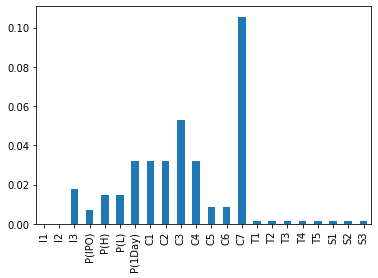

In [16]:
# Plotting null values in the columns
df.isna().mean().plot(kind='bar')

The bar graph above shows the sum of null values (`NaN`) for all the columns. As we can see, both continuous and categorical columns contain null values but we will use the `median` to `fillna()` the **continuous** columns and use the `mode` to `fillna()` the ***categorical*** columns

<ipython-input-17-6d1b35f6ff5d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().plot(kind='bar')


<AxesSubplot:>

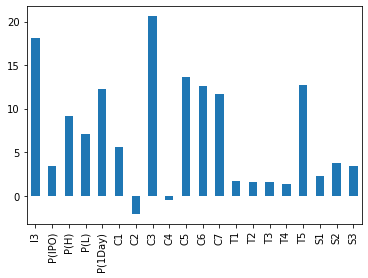

In [17]:
# Plotting the skewness of the columns
df.skew().plot(kind='bar')

Columns `C1` and `C7` are some of the more skewed columns so we decided to early normalization using `np.log()` before we proceed on the normalization later on using `PowerTransformer()`

In [18]:
df['C1'] = np.log(df['C1'])

In [19]:
df['C7'] = np.log(df['C7'])

<ipython-input-20-6ce6f21d3aab>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().plot(kind='bar')


<AxesSubplot:>

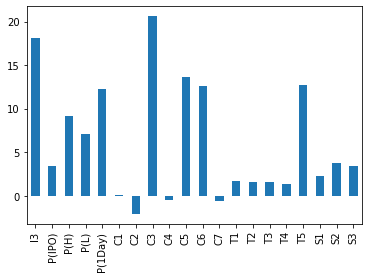

In [20]:
df.skew().plot(kind='bar')

## Dropping 22 Companies with Null P(1Day)


After further research on the null values on the `P(1Day)`, we realized that there are 22 IPO companies who did NOT have First Day Trading Price so we decided to drop the 22 IPO companies as we assume that there may be some delays due to either regulatory issues, market conditions against their favors, or company-specific issues. 

In [21]:
droppable_ipo = df[df['P(1Day)'].isna()==True].index
droppable_ipo

Int64Index([ 10,  86, 115, 123, 203, 215, 217, 268, 286, 330, 357, 400, 401,
            410, 490, 496, 503, 560, 597, 614, 615, 675],
           dtype='int64')

In [22]:
df = df.drop(droppable_ipo, axis=0)
df

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,4.804021,1.0,3.43,...,10600000.0,3.938568,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,5.556828,0.0,-1.62,...,2400000.0,3.255632,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,4.499810,1.0,-1.24,...,5000000.0,1.998503,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,5.342334,1.0,-0.91,...,4500000.0,2.143120,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,4.382027,1.0,0.07,...,8250000.0,6.449361,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,ZIP,ZIPCAR INC,7514.0,18.0,16.0,14.0,28.000000,5.758902,1.0,-0.37,...,9684109.0,5.226290,537.0,13359.0,12303.0,329.0,676.0,87.0,106.0,173.0
678,ZLTQ,Zeltiq Aesthetics Inc,3845.0,13.0,16.0,14.0,15.500000,4.584967,1.0,-0.41,...,7000000.0,3.237148,496.0,13810.0,12515.0,321.0,784.0,70.0,126.0,173.0
679,ZSTN,"ZST Digital Networks, Inc.",3663.0,8.0,8.5,7.5,7.520000,4.718499,0.0,0.60,...,3125000.0,4.015139,335.0,9067.0,8066.0,217.0,435.0,38.0,82.0,90.0
680,ZUMZ,Zumiez Inc,5600.0,19.0,17.0,15.0,12.435000,4.356709,1.0,0.20,...,3125000.0,4.769472,256.0,7087.0,6445.0,182.0,306.0,48.0,38.0,100.0


In [23]:
reset_df = df.reset_index()
reset_df.set_index('index', drop=True)
reset_df

,index,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,4.804021,1.0,...,10600000.0,3.938568,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,5.556828,0.0,...,2400000.0,3.255632,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,4.499810,1.0,...,5000000.0,1.998503,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,5.342334,1.0,...,4500000.0,2.143120,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,4.382027,1.0,...,8250000.0,6.449361,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,677,ZIP,ZIPCAR INC,7514.0,18.0,16.0,14.0,28.000000,5.758902,1.0,...,9684109.0,5.226290,537.0,13359.0,12303.0,329.0,676.0,87.0,106.0,173.0
656,678,ZLTQ,Zeltiq Aesthetics Inc,3845.0,13.0,16.0,14.0,15.500000,4.584967,1.0,...,7000000.0,3.237148,496.0,13810.0,12515.0,321.0,784.0,70.0,126.0,173.0
657,679,ZSTN,"ZST Digital Networks, Inc.",3663.0,8.0,8.5,7.5,7.520000,4.718499,0.0,...,3125000.0,4.015139,335.0,9067.0,8066.0,217.0,435.0,38.0,82.0,90.0
658,680,ZUMZ,Zumiez Inc,5600.0,19.0,17.0,15.0,12.435000,4.356709,1.0,...,3125000.0,4.769472,256.0,7087.0,6445.0,182.0,306.0,48.0,38.0,100.0


In [24]:
reset_df = reset_df.drop('index', axis=1)
reset_df

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,10.0,9.5,8.5,11.870000,4.804021,1.0,3.43,...,10600000.0,3.938568,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,8.0,10.0,8.0,7.250000,5.556828,0.0,-1.62,...,2400000.0,3.255632,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834.0,7.0,14.0,12.0,6.700000,4.499810,1.0,-1.24,...,5000000.0,1.998503,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834.0,11.5,16.0,14.0,12.390000,5.342334,1.0,-0.91,...,4500000.0,2.143120,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492.0,21.0,21.0,19.0,56.599998,4.382027,1.0,0.07,...,8250000.0,6.449361,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,ZIP,ZIPCAR INC,7514.0,18.0,16.0,14.0,28.000000,5.758902,1.0,-0.37,...,9684109.0,5.226290,537.0,13359.0,12303.0,329.0,676.0,87.0,106.0,173.0
656,ZLTQ,Zeltiq Aesthetics Inc,3845.0,13.0,16.0,14.0,15.500000,4.584967,1.0,-0.41,...,7000000.0,3.237148,496.0,13810.0,12515.0,321.0,784.0,70.0,126.0,173.0
657,ZSTN,"ZST Digital Networks, Inc.",3663.0,8.0,8.5,7.5,7.520000,4.718499,0.0,0.60,...,3125000.0,4.015139,335.0,9067.0,8066.0,217.0,435.0,38.0,82.0,90.0
658,ZUMZ,Zumiez Inc,5600.0,19.0,17.0,15.0,12.435000,4.356709,1.0,0.20,...,3125000.0,4.769472,256.0,7087.0,6445.0,182.0,306.0,48.0,38.0,100.0


<AxesSubplot:>

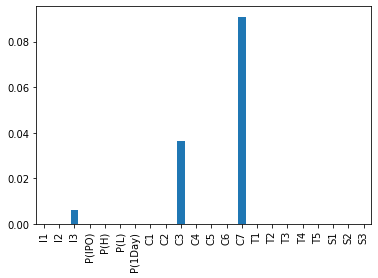

In [25]:
# Checking ratio of null values in the columns 
reset_df.isna().mean().plot(kind='bar')

## **Data Profile**

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(reset_df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Imputation

Before we begin the imputation process, we will create a list of continuous columns that we will `fillna()` with the `fillna_median` function that we have created below

In [26]:
cont_cols = ['S1','S2','S3','T1','T2','T3','T4','T5','P(IPO)','P(H)','P(L)',\
       'P(1Day)','C1','C3','C4','C5','C6','C7']

In [27]:
## Creating a function to fill null values in the continuous column with the MEDIAN
def fillna_median(df, columns):
    for col in columns:
        median = df[col].median()
        df[col].fillna(median, inplace=True)
    return df


In [28]:
## Filling the null values
df = fillna_median(reset_df, cont_cols)
print(df.isna().mean().round(4)*100)

I1         0.00
I2         0.00
I3         0.61
P(IPO)     0.00
P(H)       0.00
P(L)       0.00
P(1Day)    0.00
C1         0.00
C2         0.00
C3         0.00
C4         0.00
C5         0.00
C6         0.00
C7         0.00
T1         0.00
T2         0.00
T3         0.00
T4         0.00
T5         0.00
S1         0.00
S2         0.00
S3         0.00
dtype: float64


Since `I3` is a text column, we will `fillna()` the column with the `mode` 

In [29]:
## Filling the I3 Null Values with the MODE
df['I3'] = df['I3'].fillna(df['I3'].mode()[0])

<AxesSubplot:>

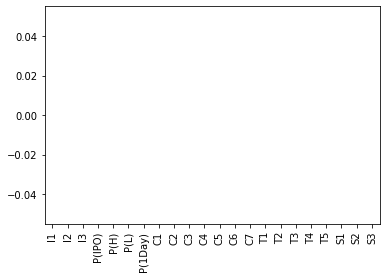

In [30]:
df.isna().mean().plot(kind='bar')

The imputation process is successful as there is no more null values in the `df`. Now we will continue on the feature engineering section for both control and target variables.

## **Profile after Imputation**

In [ ]:
profile_after_imputation = ProfileReport(df)

profile_after_imputation

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Engineering 

In [31]:
# Avg stock price between the higher and lower bounds
df['P(mid)'] = (df['P(H)']+df['P(L)'])/2
df.dtypes

I1          object
I2          object
I3         float64
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
P(mid)     float64
dtype: object

In [32]:
# T4^ is the ratio of total sentences which are long
df['T4^'] = df['T4']/df['T1']

df['T4^'] = df['T4^'].replace(np.inf, df['T4^'].median())

df['T4^']

0      0.640426
1      0.644753
2      0.636816
3      0.539634
4      0.587413
         ...   
655    0.612663
656    0.647177
657    0.647761
658    0.710938
659    0.670702
Name: T4^, Length: 660, dtype: float64

In [33]:
#Ratio number of real words (T3) against all words (T1)
df['T3^'] = df['T3']/df['T2']

df['T3^'] = df['T3^'].replace(np.inf, df['T3^'].median())

df['T3^']

0      0.908876
1      0.898724
2      0.909350
3      0.917060
4      0.888469
         ...   
655    0.920952
656    0.906227
657    0.889600
658    0.909412
659    0.904288
Name: T3^, Length: 660, dtype: float64

In [34]:
#Ratio of long words against all words
df['T5^'] = df['T5']/df['T2']



df['T5^'] = df['T5^'].replace(np.inf, df['T5^'].median())






In [35]:
#Percentage of positive words
df['S1^'] = df['S1']/df['T2']

df['S1^'] = np.where(df['S1^'] == np.inf, df['S1^'].median(), df['S1^'])

# df['S1^'].astype('float64')

df['S1^'].dtype

dtype('float64')

In [36]:
#Percentage negative words
df['S2^'] = df['S2']/df['T2']

df['S2^'] = df['S2^'].replace(np.inf, df['S2^'].median())

df['S2^']

0      0.009199
1      0.011105
2      0.006271
3      0.007144
4      0.010047
         ...   
655    0.007935
656    0.009124
657    0.009044
658    0.005362
659    0.008834
Name: S2^, Length: 660, dtype: float64

In [37]:
#Percentage of uncertain words
df['S3^'] = df['S3']/df['T2']

df['S3^'] = df['S3^'].replace(np.inf, df['S3^'].median())

df['S3^']

0      0.010929
1      0.010876
2      0.011403
3      0.013319
4      0.011261
         ...   
655    0.012950
656    0.012527
657    0.009926
658    0.014110
659    0.013551
Name: S3^, Length: 660, dtype: float64

In [38]:
df.iloc[:, -10:].head()

,S1,S2,S3,P(mid),T4^,T3^,T5^,S1^,S2^,S3^
0,62.0,117.0,139.0,9.0,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929
1,71.0,242.0,237.0,9.0,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876
2,61.0,33.0,60.0,13.0,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403
3,80.0,59.0,110.0,15.0,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319
4,67.0,149.0,167.0,20.0,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261


#### Target Variables: Y1 & Y2

In [39]:
## Creating the Y1 target columns

#Y1 is the Pre-IPO Price Revision
df['Y1'] = np.where(df['P(IPO)']<df['P(mid)'], 1,0)
df['Y1'] = df['Y1'].astype('category')
df['Y1'].dtypes



CategoricalDtype(categories=[0, 1], ordered=False)

In [40]:
## Creating the Y2 target columns

#Y2 is the Post-IPO Initial Return
df['Y2'] = np.where(df['P(IPO)']<df['P(1Day)'], 1,0)
df['Y2'] = df['Y2'].astype('category')
df['Y2'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

#### Control Variables: C3^, C5^, C6^

In [41]:
#Share Overhang
df['C5^'] =  df['C5']/df['C6']
df['C5^'].dtypes



dtype('float64')

In [42]:
#Positive EPS Dummy
#Dummy variable set to 1 if C3 is positive at the time of the IPO, otherwise 0
df['C3^'] = np.where(df['C3'] > 0, 1, 0)

df['C3^'].head() 

0    1
1    0
2    0
3    0
4    1
Name: C3^, dtype: int64

In [43]:
#Up Revision
#Set to (P(IPO) – P(mid))/P(mid) x 100%, if P(IPO) > P(mid), otherwise 0
df['C6^'] = np.where(df['P(IPO)'] > df['P(mid)'], (df['P(IPO)'] - df['P(mid)'])/df['P(mid)'] * 100, 0)

df['C6^'] 

0      11.111111
1       0.000000
2       0.000000
3       0.000000
4       5.000000
         ...    
655    20.000000
656     0.000000
657     0.000000
658    18.750000
659     6.666667
Name: C6^, Length: 660, dtype: float64

In [44]:
df.dtypes

I1           object
I2           object
I3          float64
P(IPO)      float64
P(H)        float64
P(L)        float64
P(1Day)     float64
C1          float64
C2          float64
C3          float64
C4          float64
C5          float64
C6          float64
C7          float64
T1          float64
T2          float64
T3          float64
T4          float64
T5          float64
S1          float64
S2          float64
S3          float64
P(mid)      float64
T4^         float64
T3^         float64
T5^         float64
S1^         float64
S2^         float64
S3^         float64
Y1         category
Y2         category
C5^         float64
C3^           int64
C6^         float64
dtype: object

#### Extra Features (OHE)

If the SIC code starts with either "37" or "73", then we will label them as "Tech", otherwise it will be a "Non-Tech". The function below will label each IPO companies accordingly. 

In [45]:
# Splitting companies to Tech vs. Non-Tech
def categorize_sic_code(sic_code):
    if str(sic_code).startswith("37") or str(sic_code).startswith("73"):
        return "Tech"
    else:
        return "Non-Tech"

In [46]:
# Categorize Companies if Tech or Non-Tech
df['I3_type'] = df['I3'].apply(categorize_sic_code)
df[['I3','I3_type']].sample(10)

,I3,I3_type
413,3845.0,Non-Tech
353,3674.0,Non-Tech
396,5944.0,Non-Tech
34,8221.0,Non-Tech
639,7359.0,Tech
103,3661.0,Non-Tech
533,7380.0,Tech
516,3661.0,Non-Tech
502,2834.0,Non-Tech
392,3825.0,Non-Tech


In [47]:
df['I3^'] = np.where(df['I3_type']=='Tech', 1, 0)
df['I3^'] = df['I3^'].astype('category')

We assume that `P(H)` should be higher than `P(L)` so we decided to go through each observation and whenever the `P(L)` is higher than `P(H)`, we will switch the price in the below function. 

In [48]:
# To check if P(H) > P(L), if not then switch the price
def switch_prices(high_price, low_price):
    if high_price < low_price:
        temp = high_price
        high_price = low_price
        low_price = temp
    return (high_price, low_price)

In [49]:
df[['P(H)', 'P(L)']] = df.apply(lambda x: switch_prices(x['P(H)'], x['P(L)']), axis=1, result_type="expand")


In [50]:
def categorize_industry(sic_code):
  if sic_code in manuf_codes:
    return "Manufacturing"
  elif sic_code in serv_codes:
    return "Service"
  elif sic_code in other_codes:
    return "Other"
  else:
    return "Other"

df['Industry'] = df['I3'].apply(categorize_industry)

In [51]:
industry_dummy = pd.get_dummies(df['Industry'])
industry_dummy

,Manufacturing,Other,Service
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
655,0,0,1
656,0,0,1
657,1,0,0
658,0,0,1


#### Isolating Continuous and Categorical Features (End of Feature Engineering)

In [52]:
cat_cols = ['I1','I2','I3','C2','Y1','Y2','C3^', 'I3^']

In [53]:
cat_df = df[cat_cols]
cat_df.dtypes

I1       object
I2       object
I3      float64
C2      float64
Y1     category
Y2     category
C3^       int64
I3^    category
dtype: object

In [54]:
cont_cols = ['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','C1','C3','C4','C5','C6','C7','T3^','T4^','T5^','S1^','S2^','S3^', 'C5^','C6^']

cont_df = df[cont_cols]
cont_df.dtypes

P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
P(mid)     float64
C1         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T3^        float64
T4^        float64
T5^        float64
S1^        float64
S2^        float64
S3^        float64
C5^        float64
C6^        float64
dtype: object

In [55]:
cont_df.describe()

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,14.034621,15.634636,13.611152,25.934766,14.622894,4.757714,0.066724,0.007282,4.996285e+07,1.258248e+07,4.600274,0.889822,0.626720,0.052064,0.005302,0.009028,0.011494,4.417255,5.404645
std,5.954214,6.576552,5.824075,73.234948,6.187137,0.670366,158.390378,0.033318,1.055377e+08,2.539940e+07,1.916794,0.064613,0.077686,0.007087,0.001752,0.002953,0.002816,5.133537,10.877569
min,5.000000,6.000000,0.000000,0.000000,4.000000,2.302585,-786.239000,-0.162352,3.693227e+06,8.000000e+05,-2.603690,0.000000,0.000000,-0.000089,-0.000093,0.002152,0.005326,0.283223,0.000000
25%,10.000000,13.000000,11.000000,11.000000,12.000000,4.442651,-0.795000,-0.013927,1.877568e+07,5.124546e+06,3.724681,0.883417,0.580329,0.047544,0.004131,0.006966,0.009579,2.850622,0.000000
50%,13.750000,15.500000,13.000000,14.845000,14.250000,4.672829,0.000000,0.009125,2.745438e+07,7.500000e+06,4.677133,0.897260,0.628861,0.051926,0.005024,0.008573,0.011300,3.731035,0.000000
75%,17.000000,17.000000,15.000000,20.485000,16.000000,5.045033,0.402500,0.031571,5.003986e+07,1.200000e+07,5.706326,0.909651,0.674461,0.056401,0.006240,0.010503,0.012841,4.857904,7.692308
max,85.000000,135.000000,108.000000,1159.200562,121.500000,7.643483,3864.500000,0.092896,2.138085e+09,4.212336e+08,10.331464,0.962052,0.826347,0.073417,0.012839,0.024605,0.029397,99.787255,100.000000


# **Scaling**

#### MinMax Scaling

In [56]:
minmaxscaler = preprocessing.MinMaxScaler()

#The code below chnages the Saclaed data into numpy arrays
scaled_data = minmaxscaler.fit_transform(cont_df)

# Scaled data into data frame and reassigning columns
scaled_df = pd.DataFrame(scaled_data, columns=cont_cols)

scaled_df.head()

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
0,0.06250,0.027132,0.078704,0.010240,0.042553,0.468355,0.169794,0.749962,0.017461,0.023309,0.505773,0.944727,0.775008,0.739238,0.384127,0.313837,0.232749,0.035990,0.111111
1,0.03750,0.031008,0.074074,0.006254,0.042553,0.609306,0.168708,0.583748,0.011795,0.003806,0.452977,0.934175,0.780245,0.700404,0.259124,0.398734,0.230548,0.118042,0.000000
2,0.02500,0.062016,0.111111,0.005780,0.076596,0.411396,0.168790,0.717213,0.006162,0.009990,0.355790,0.945220,0.770640,0.841461,0.903612,0.183452,0.252440,0.031013,0.000000
3,0.08125,0.077519,0.129630,0.010688,0.093617,0.569146,0.168861,0.714502,0.005227,0.008800,0.366970,0.953234,0.653036,0.839640,0.756214,0.222305,0.332049,0.030315,0.000000
4,0.20000,0.116279,0.175926,0.048827,0.136170,0.389343,0.169072,0.499347,0.012673,0.017720,0.699880,0.923515,0.710854,0.661703,0.356542,0.351622,0.246559,0.034602,0.050000


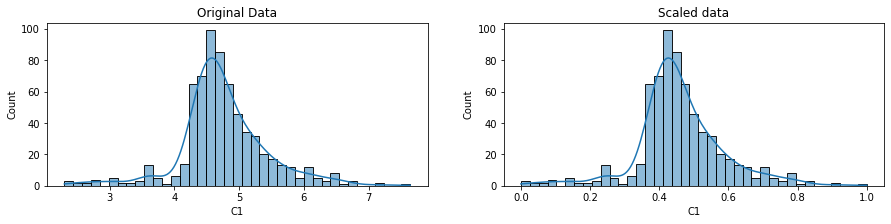

In [57]:
# plot both together to compare
# Using 'C1' as example
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(cont_df['C1'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_df['C1'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

All coumn values now operate on the same scale.


In [58]:
print('Mins\n', scaled_df.min(),'\n\nMaxes\n', scaled_df.max())

Mins
 P(IPO)     0.0
P(H)       0.0
P(L)       0.0
P(1Day)    0.0
P(mid)     0.0
C1         0.0
C3         0.0
C4         0.0
C5         0.0
C6         0.0
C7         0.0
T3^        0.0
T4^        0.0
T5^        0.0
S1^        0.0
S2^        0.0
S3^        0.0
C5^        0.0
C6^        0.0
dtype: float64 

Maxes
 P(IPO)     1.0
P(H)       1.0
P(L)       1.0
P(1Day)    1.0
P(mid)     1.0
C1         1.0
C3         1.0
C4         1.0
C5         1.0
C6         1.0
C7         1.0
T3^        1.0
T4^        1.0
T5^        1.0
S1^        1.0
S2^        1.0
S3^        1.0
C5^        1.0
C6^        1.0
dtype: float64


Here we can see that the data has been scaled successfully by putting values in all columns on a scale between 0 and 1.

# Outlier Handling

#### IQR

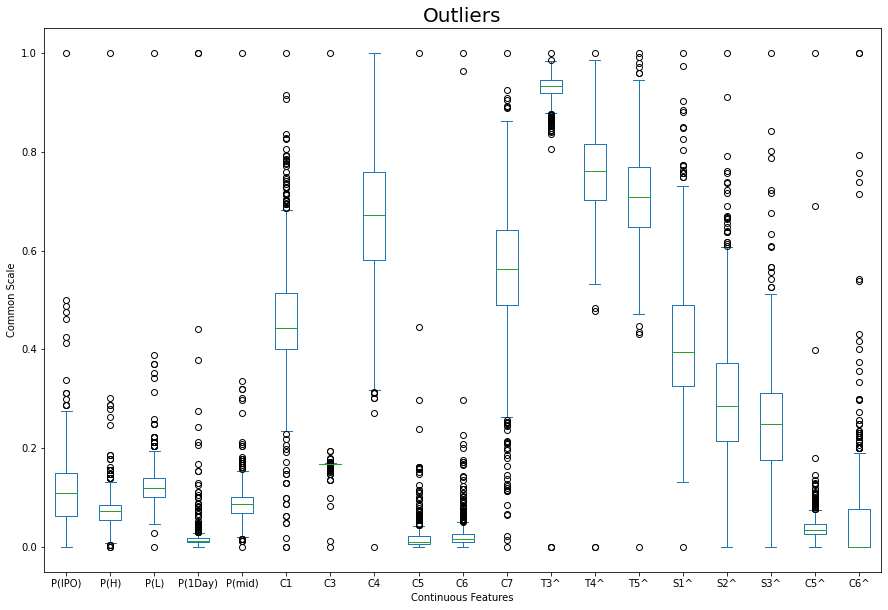

In [59]:
scaled_df.plot(kind='box', figsize=(15,10))
plt.title('Outliers', fontsize=20)
plt.xlabel('Continuous Features')
plt.ylabel('Common Scale')

plt.style.use('ggplot')





We see that the columns all have outlier values so we will proceed with Outlier handling using Interquartile range.

In [60]:
def outlier_replace(col):
  '''
  # This function takes a series (column)
  and replaces detected outliers with the 
  lower and uper bounds of the data.
  ---
  Input:
  col(float or int): A column of choice either 
  int or float.
  ---
  Output:
  The column with the outlier values replaced
  with lower and upper bound values of the date
  '''
  q1 = np.quantile(col, .25) #1st quantile
  q3 = np.quantile(col, .75) #3rd quantile

  iqr = q3 - q1 #The interquartile range. The middle 50% of the observations

  bound_lower = q1 - 1.5 * iqr #lower bounds
  bound_upper = q3 + 1.5 * iqr #upper bounds

  #replace values below the lower bounds with the lower bound value
  col = np.where(col < bound_lower, bound_lower, col) 

  #replace values above the upper bounds with the upper bound value
  col = np.where(col > bound_upper, bound_upper, col)



  return  col

/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Text(0, 0.5, 'Common Scale')

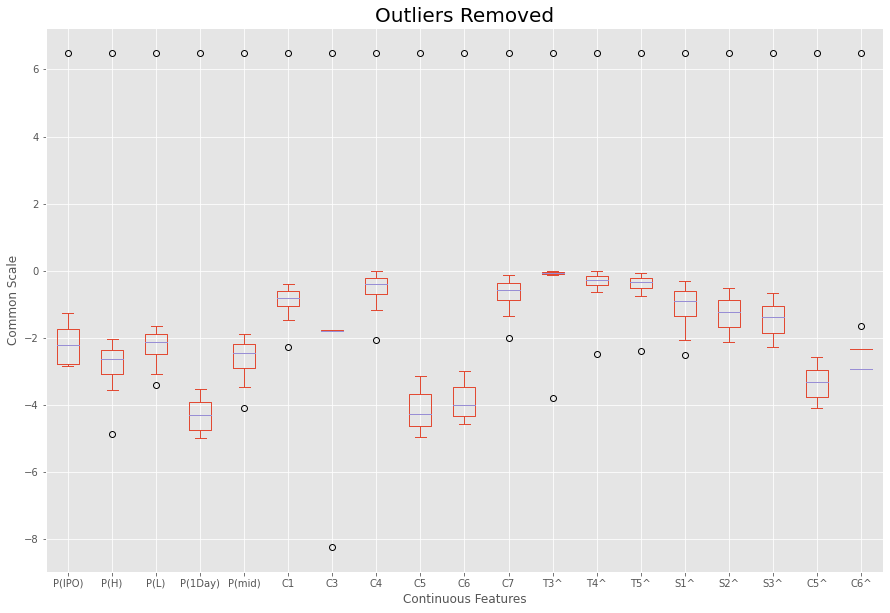

In [61]:
handled_df = pd.DataFrame()

for c in list(scaled_df.columns):
  handled_df[c] = outlier_replace(scaled_df[c])


#Logged for better visualization.
np.log(handled_df.describe()).plot(kind='box', figsize=(15,10))
plt.title('Outliers Removed',fontsize=20)
plt.xlabel('Continuous Features')
plt.ylabel('Common Scale')


In [62]:
handled_df.describe()

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,0.109978,0.071334,0.122634,0.014288,0.086978,0.459375,0.169001,0.665178,0.015961,0.020842,0.561052,0.929604,0.760165,0.710088,0.414902,0.302929,0.252564,0.037452,0.043639
std,0.058658,0.028783,0.033755,0.006969,0.031332,0.103728,0.000267,0.128335,0.012380,0.014248,0.134797,0.022599,0.084616,0.091758,0.127814,0.121092,0.103823,0.016562,0.064314
min,0.000000,0.007752,0.046296,0.000000,0.017021,0.231514,0.168500,0.314119,0.000000,0.000000,0.259441,0.877360,0.531414,0.467271,0.081941,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.054264,0.101852,0.009489,0.068085,0.400694,0.168886,0.581494,0.007066,0.010286,0.489238,0.918264,0.702283,0.648012,0.326621,0.214373,0.176694,0.025802,0.000000
50%,0.109375,0.073643,0.120370,0.012806,0.087234,0.443791,0.169057,0.671804,0.011133,0.015936,0.562871,0.932652,0.761013,0.707622,0.395663,0.285960,0.248183,0.034650,0.000000
75%,0.150000,0.085271,0.138889,0.017672,0.102128,0.513481,0.169143,0.759743,0.021714,0.026639,0.642437,0.945533,0.816195,0.768507,0.489740,0.371921,0.312201,0.045975,0.076923
max,0.281250,0.131783,0.194444,0.029945,0.153191,0.682661,0.169530,1.000000,0.043686,0.051169,0.872234,0.986437,0.987064,0.949248,0.734419,0.608242,0.515460,0.076234,0.192308


Outliers are now removed from the data.

# **Normalization**

The data is skewed and Normalization will help make it more evenly distributed. 

Text(0, 0.5, 'Skewness')

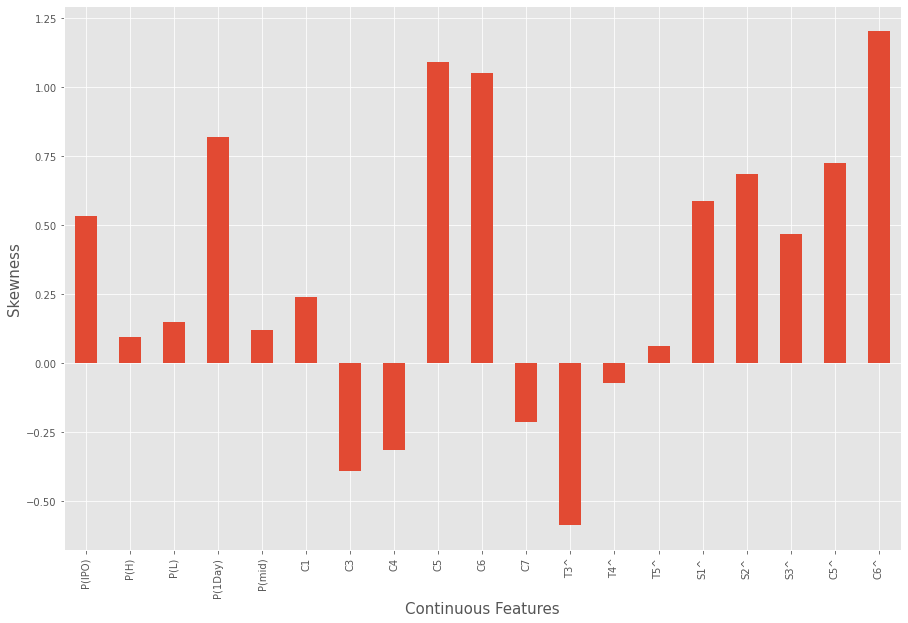

In [63]:
handled_df.skew().plot(kind='bar', figsize=(15, 10))
plt.xlabel('Continuous Features',fontsize=15)
plt.ylabel('Skewness', fontsize=15)

Some values here an absolute skewness well above .5 and normalizing the df will help reduce this.

#### PowerTransformer

In [64]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

print(pt.fit(handled_df))

print(pt.lambdas_)

#normalizing the values
normal_df = pt.transform(handled_df)


PowerTransformer()
[-2.58458029e+00 -3.57959867e-01 -9.29837389e-01 -4.81757166e+01
 -5.91227418e-01 -3.08919448e-03  6.18924360e+02  2.49634121e+00
 -5.28143820e+01 -4.18100228e+01  1.79337726e+00  1.94459438e+01
  1.52576126e+00  6.26372688e-01 -1.44076462e+00 -1.95709247e+00
 -1.03795047e+00 -1.64899821e+01 -1.67936962e+01]


In [65]:
#Changing back into a Data Frame

normal_df = pd.DataFrame(normal_df, columns=cont_cols)

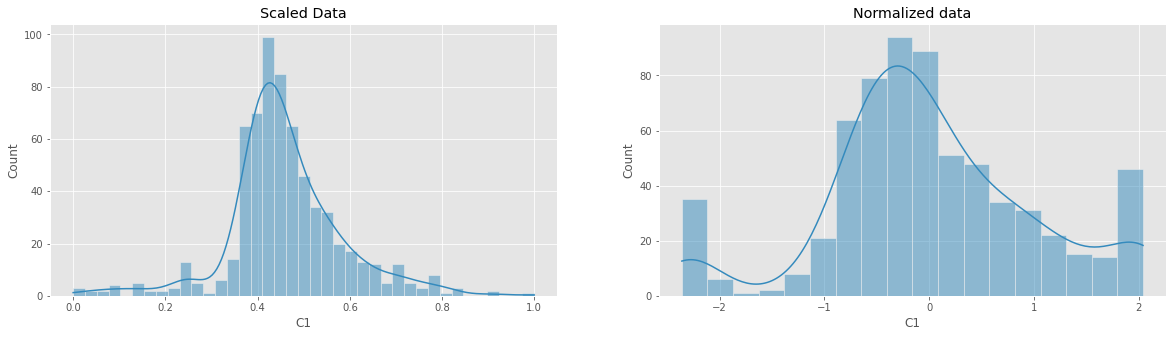

In [66]:
# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(20, 5))

sns.histplot(scaled_df['C1'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Scaled Data")

sns.histplot(normal_df['C1'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")

plt.show()

The data is now more evenly distributed in the normal_df through PowerTransformer assuming that the values are both positive and negative


Text(0, 0.5, 'Skewness')

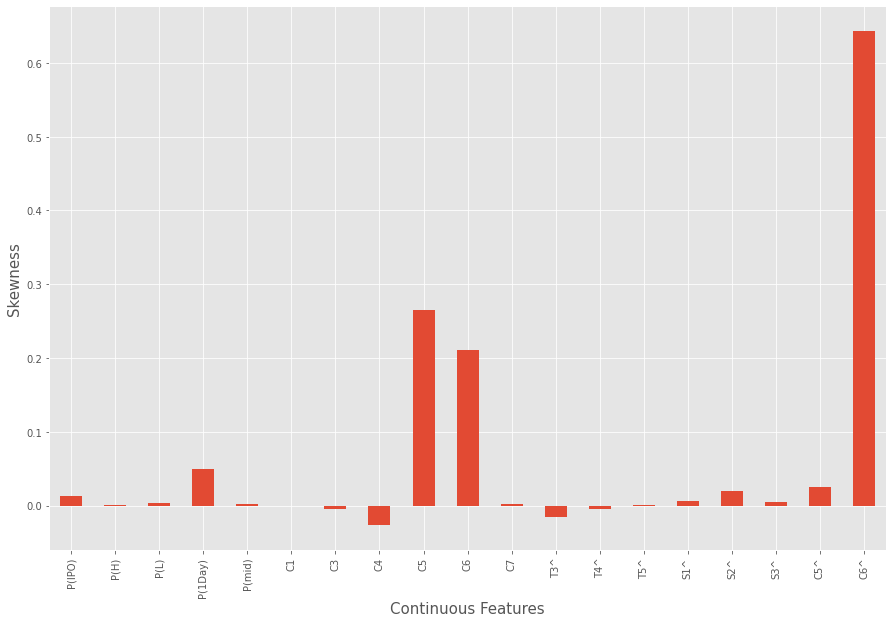

In [67]:

normal_df.skew().plot(kind='bar', figsize=(15, 10))
plt.xlabel('Continuous Features',fontsize=15)
plt.ylabel('Skewness', fontsize=15)




We can see the data is more normally distributed after the transformation as the shape is more bell-curved and the mean is moved towards the center. The values are also much less skewed.

# Combining the Data

In [68]:
p2b_df = pd.concat([normal_df,cat_df,industry_dummy], axis=1)
p2b_df

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,...,I2,I3,C2,Y1,Y2,C3^,I3^,Manufacturing,Other,Service
0,-0.799594,-1.563735,-1.326406,-0.518306,-1.444940,0.122079,2.249693,0.637642,0.466363,0.490111,...,ADVANCED ANALOGIC TECHNOLOGIES INC,3674.0,1.0,0,1,1,0,1,0,0
1,-1.330556,-1.421346,-1.475471,-1.340729,-1.444940,1.414605,-1.102746,-0.678313,-0.116525,-1.732482,...,ACCENTIA BIOPHARMACEUTICALS INC,2834.0,0.0,1,0,0,0,0,1,0
2,-1.613668,-0.307815,-0.316539,-1.449726,-0.311482,-0.435926,-0.830485,0.362752,-0.899204,-0.821813,...,ACADIA PHARMACEUTICALS INC,2834.0,1.0,1,0,0,0,0,1,0
3,-0.429811,0.232531,0.235407,-0.435348,0.234103,1.058277,-0.584316,0.340348,-1.053560,-0.978873,...,ACHILLION PHARMACEUTICALS INC,2834.0,1.0,1,1,0,0,0,1,0
4,1.457906,1.538403,1.541802,1.856354,1.540809,-0.658061,0.203597,-1.272655,-0.014414,0.027256,...,AMERICAN COMMERCIAL LINES INC.,4492.0,1.0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.935600,0.232531,0.235407,1.373913,0.234103,1.742233,-0.161034,-0.143285,0.356456,0.322496,...,ZIPCAR INC,7514.0,1.0,0,1,0,0,0,0,1
656,-0.082317,0.232531,0.235407,0.024752,0.234103,-0.277479,-0.193287,1.674811,0.090347,-0.266998,...,Zeltiq Aesthetics Inc,3845.0,1.0,1,1,0,0,0,0,1
657,-1.330556,-1.850713,-1.625781,-1.288139,-1.737552,-0.032567,0.667723,0.682800,-1.332127,-1.454020,...,"ZST Digital Networks, Inc.",3663.0,0.0,0,0,1,0,1,0,0
658,1.116359,0.498760,0.504882,-0.428254,0.501856,-0.706271,0.314865,0.745272,-1.188574,-1.454020,...,Zumiez Inc,5600.0,1.0,0,0,1,0,0,0,1


In [69]:
p2b_df.isna().sum()

P(IPO)           0
P(H)             0
P(L)             0
P(1Day)          0
P(mid)           0
C1               0
C3               0
C4               0
C5               0
C6               0
C7               0
T3^              0
T4^              0
T5^              0
S1^              0
S2^              0
S3^              0
C5^              0
C6^              0
I1               0
I2               0
I3               0
C2               0
Y1               0
Y2               0
C3^              0
I3^              0
Manufacturing    0
Other            0
Service          0
dtype: int64

In [70]:
p2b_df = p2b_df.dropna(how='any')

p2b_df.isna().sum()

P(IPO)           0
P(H)             0
P(L)             0
P(1Day)          0
P(mid)           0
C1               0
C3               0
C4               0
C5               0
C6               0
C7               0
T3^              0
T4^              0
T5^              0
S1^              0
S2^              0
S3^              0
C5^              0
C6^              0
I1               0
I2               0
I3               0
C2               0
Y1               0
Y2               0
C3^              0
I3^              0
Manufacturing    0
Other            0
Service          0
dtype: int64

In [71]:
p2b_df.shape

(660, 30)

In [73]:
p2b_df.to_csv('/content/drive/MyDrive/Colab Notebooks/data/wilson.csv')

# **Feature Selection**

In [72]:
# Import the necessary libraries first
#### Correlation method - for classification chi2 only
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
#### RFE method - replace the model with the model you plan to use
from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
#### feature importance method
#### this method can be used for both topK and cut-off
from sklearn.linear_model import Ridge
#### specifically tree-based feature importance method
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
#### for voting
from collections import Counter
#### for ANOVA
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [76]:
usable_cols = ['T3^','T4^','T5^','S1^','S2^','S3^','C1','C2','C3^','C5^','C6^','C7','I3^','Manufacturing','Service','Other','Y1','Y2']

In [77]:
features_df = p2b_df[usable_cols]
features_df

,T3^,T4^,T5^,S1^,S2^,S3^,C1,C2,C3^,C5^,C6^,C7,I3^,Manufacturing,Service,Other,Y1,Y2
0,0.636355,0.163470,0.326870,-0.144082,0.227863,-0.112751,0.122079,1.0,1,0.045357,1.359644,-0.441877,0,1,0,0,0,1
1,0.105670,0.225802,-0.095681,-1.330368,0.873961,-0.134989,1.414605,0.0,0,1.950020,-0.764362,-0.820026,0,0,0,1,1,0
2,0.662433,0.111557,1.422641,2.109018,-1.043614,0.082652,-0.435926,1.0,0,-0.292015,-0.764362,-1.487951,0,0,0,1,1,0
3,1.104554,-1.260530,1.403324,2.109018,-0.622530,0.812709,1.058277,1.0,0,-0.341634,-0.764362,-1.412984,0,0,0,1,1,1
4,-0.378824,-0.592152,-0.520388,-0.383018,0.530250,0.024954,-0.658061,1.0,1,-0.045872,0.667638,1.039516,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,1.340777,-0.234069,-0.213618,0.818172,-0.273502,0.679219,1.742233,1.0,0,0.109803,1.662534,0.300111,0,0,1,0,0,1
656,0.492704,0.260754,0.697111,-0.018830,0.199878,0.522163,-0.277479,1.0,0,0.542703,-0.764362,-0.830111,0,0,1,0,1,1
657,-0.327813,0.269176,-0.606538,-0.612593,0.169785,-0.547710,-0.032567,0.0,1,-0.081276,-0.764362,-0.398812,0,1,0,0,0,0
658,0.665830,1.190939,-1.332708,0.953457,-1.528427,1.088957,-0.706271,1.0,1,0.269316,1.653161,0.032582,0,0,1,0,0,0


## Data Dictionary 

In [ ]:
variables = {
    "descriptions":{
        "I3_Type" : "Type of IPO Companies based on the SIC. If the SIC code starts with either `37` or `73` then it is a Tech company otherwise it is a Non-Tech",
        "I3^" : "A binary column related to column I3_Type: 1 if the company is Tech; and 0 if the company is Non-Tech",
        "Industry" : "Using the 'categorize_industry' function, this column will determine whether the company is in Manufacturing, Service, or Other industry",
        "Manufacturing" : "OHE variable: 1 if the Industry is Manufacturing",
        "Service" : "OHE variable: 1 if the Industry is Service",
        "Others" : "OHE variable: 1 if the Industry is Other"}
}

data_dict = ProfileReport(features_df,
                          variables = variables)
data_dict

Output hidden; open in https://colab.research.google.com to view.

In [78]:
X = features_df.drop(columns=['Y1','Y2'])
y1 = features_df['Y1']
y2 = features_df['Y2']

In [ ]:
X.head()

In [ ]:
y1.head()

In [ ]:
X.shape

In [ ]:
y1.shape

In [ ]:
def feature_selector(X, y, model, names, _method="topk", n=int(X.shape[1]/2), fit_X=False, thres = 0.1):
  """voting based feature selector
  - _method: "topk" for top-K method (default), "cutoff" for cut-off based method
  - n: number of features to be selected. only available for top-K method - default half of the total features
  - thres: cut-off threshold (default 0.1), only availabel for cutoff method
  - fit_X: fit_transform X or just return indices
  TODO: include support for regression problems
  """
  #### Placeholder for tests
  # X.shape[0] == y.shape[0]
  if names: # if given feature names
    feature_names = np.array(names)
  else: # otherwise use location
    feature_names = np.array(["X%s" % x for x in range(len(X.shape[0]))])
  if _method == 'topk':
    #### np.argpartition gets the indices of the largest n element from the array in ascending order
    #### [::-1] reverse the order
    ############################################################################
    #### IMPORTANT: 
    #### use `chi2` as the `score_func` when doing categorical features - values has to be non-negative
    #### use `f_classif` as the `score_func` when doing categorical and continuous feautures
    #### use `f_regression` as the `score_func` when doing continuous feautures
    ############################################################################
    corr_features = list(np.argpartition(SelectKBest(score_func=f_classif, k=n).fit(X,y).scores_, -n)[-n:][::-1])
    #### binary masking on features, use np.where() to get the indices of selected
    rfe_features = list(np.where(RFE(model, n_features_to_select=n, step=1).fit(X, y).support_)[0])
    #### argsort get sorted indices by values, ::-1] reverse the asceding order
    ridge_features = list(np.argsort(Ridge(alpha=1.0).fit(X, y).coef_)[-n:][::-1])
    #### using ExtraTree
    extratree_features = list(np.argsort(ExtraTreesClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    ### using Random Forest:
    rf_features = list(np.argsort(RandomForestClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    print("Using the Top-K method: ")
    print("Selected features by correlation: ", feature_names[corr_features])
    print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])

  elif _method == 'cutoff':
    corr_features, rfe_features = list(), list() #### N/A
    ridge_features = list(np.where(Ridge(alpha=1.0).fit(X, y).coef_ > thres)[0])
    extratree_features = list(np.where(ExtraTreesClassifier().fit(X, y).feature_importances_ > thres)[0])
    rf_features = list(np.where(RandomForestClassifier().fit(X, y).feature_importances_ > thres)[0])
    print("Using the Cutoff method: ")
    # print("Selected features by correlation: ", feature_names[corr_features])
    # print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])
  else:
    return("Only Top-K and Cutoff methods are currently supported!")

  ######################################
  #### combine results using voting ####
  ######################################
  counted = Counter(np.concatenate((corr_features, rfe_features, ridge_features, extratree_features, rf_features), axis=None)).most_common(n)

  #### list of tuples (feature_index, votes)
  counted.sort(key = lambda x: x[1], reverse=True)
  final_select_series = pd.Series({feature_names[f]:c for f,c in counted}).sort_values(ascending=False)
  
  selected_idx = sorted([f for f,c in counted])
  assert len(selected_idx) == n
  print(final_select_series)
  if fit_X:
    return(X[:,selected_idx])
  else:
    return(feature_names[selected_idx])





In [ ]:
for i in range(10,0, -1):
  feature_selector(X, y2, model=RandomForestClassifier(), names = usable_cols, n=i)

# **Final Profiling**

In [ ]:
!pip install ydata-profiling

In [ ]:
final_profile = ProfileReport(final_df)
final_profile

Output hidden; open in https://colab.research.google.com to view.

# Process 2B Data Export 

In [79]:
final_cols = ['T3^','S1^','S2^','T4^','T5^','C5^','C6^','C7','Y1','Y2']
final_df = features_df[final_cols]
final_df

,T3^,S1^,S2^,T4^,T5^,C5^,C6^,C7,Y1,Y2
0,0.636355,-0.144082,0.227863,0.163470,0.326870,0.045357,1.359644,-0.441877,0,1
1,0.105670,-1.330368,0.873961,0.225802,-0.095681,1.950020,-0.764362,-0.820026,1,0
2,0.662433,2.109018,-1.043614,0.111557,1.422641,-0.292015,-0.764362,-1.487951,1,0
3,1.104554,2.109018,-0.622530,-1.260530,1.403324,-0.341634,-0.764362,-1.412984,1,1
4,-0.378824,-0.383018,0.530250,-0.592152,-0.520388,-0.045872,0.667638,1.039516,0,1
...,...,...,...,...,...,...,...,...,...,...
655,1.340777,0.818172,-0.273502,-0.234069,-0.213618,0.109803,1.662534,0.300111,0,1
656,0.492704,-0.018830,0.199878,0.260754,0.697111,0.542703,-0.764362,-0.830111,1,1
657,-0.327813,-0.612593,0.169785,0.269176,-0.606538,-0.081276,-0.764362,-0.398812,0,0
658,0.665830,0.953457,-1.528427,1.190939,-1.332708,0.269316,1.653161,0.032582,0,0


In [80]:
final_df.to_csv('/content/drive/MyDrive/Colab Notebooks/data/wilson.csv')

In [ ]:
# Calculate correlation matrix
corr_matrix = final_df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
sns.set(rc = {'figure.figsize':(20,8)})

plt.show()

In [ ]:
out_path = '/content/drive/MyDrive/Classroom/DATA 6545: Data Science and MLOps SP2023/Group6_data.csv'
final_df.to_csv()



*   Features for Y1: `T3^`,`S1^`,`S2^`,`T4^`,`T5^`,`C5^`,`C7`
*   Features for Y2: `T3^`,`T5^`,`C5^`,`C6^`,`S2^`

